In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('D:\\DataSets\\archive_2\\income_evaluation.csv')
df.columns.tolist()
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# In columns names there is space at the start of columns so, remove this
df.columns=df.columns.str.replace(' ','')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [6]:
df.education.unique().tolist()

[' Bachelors',
 ' HS-grad',
 ' 11th',
 ' Masters',
 ' 9th',
 ' Some-college',
 ' Assoc-acdm',
 ' Assoc-voc',
 ' 7th-8th',
 ' Doctorate',
 ' Prof-school',
 ' 5th-6th',
 ' 10th',
 ' 1st-4th',
 ' Preschool',
 ' 12th']

In [7]:
df['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [8]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [9]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

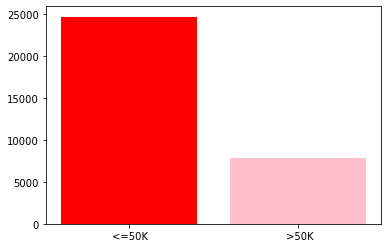

In [10]:
income_data=df['income'].value_counts().reset_index()
income_data.columns=['income','frequency']

plt.bar(income_data['income'],income_data['frequency'],color=['red','pink']);
# imblance classes, huge difference

In [11]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [12]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


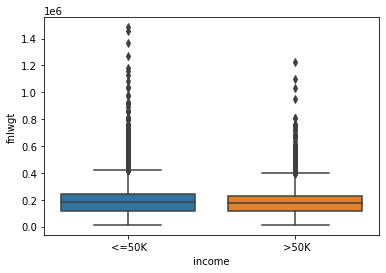

In [13]:
sns.boxplot(x=df['income'],y=df['fnlwgt']);
# There are outliers

### Let's prepare the data for model

In [14]:
# X=df[['age','fnlwgt','education-num','sex','capital-gain','capital-loss','hours-per-week']]
# # x.info()
# X['sex']=X['sex'].astype("category")

# here is the 'sex' column which is categorical so, we have to label this column...
# There is two main labelling concepts.
# one is label-encoding and other is one-hot-encoding

# remember perform encoding after train test split 

# if you have some kind of order and have more categories then you use label-encoding
# if you don't have any order and have comparitively less categories then you should 
# choose one-hot-encoding


# there is different methods for both encodings in python

# label-encoding method # 01

# x.info()
# x['sex'] = x['sex'].cat.codes
# x['sex']

# label-encoding method # 02

# using sklearn

# from sklearn.preprocessing import LabelEncoder
# labelencoder=LabelEncoder()
# x['sex'] = labelencoder.fit_transform(x['sex'])
# x['sex'][1:30]

# one-hot-encoding method # 01

# using sklearn
# OneHotEncoder from SciKit library only takes numerical categorical values

# x['sex'] = x['sex'].cat.codes
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# enc_df=pd.DataFrame(enc.fit_transform(df[['sex']]).toarray())
# df = df.join(enc_df)
# df.head()

# one-hot-encoding method # 02

# using get_dummies methods

# x1 = pd.DataFrame(x['sex'], columns=['sex'])
# # generate binary values using get_dummies
# dum_df = pd.get_dummies(x1, columns=["sex"], prefix=["Type_is"] )
# # merge with main df bridge_df on key values
# x = x.join(dum_df)
# x

# some algorithm preform well on categorical variable like decision tree but some 
# required to convert categorical to numerical form

In [15]:
X=df[['age','fnlwgt','education-num','sex','capital-gain','capital-loss','hours-per-week']]
X['sex']=X['sex'].astype("category")
Y=df['income']
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=1,train_size=0.75)

labelencoder=LabelEncoder()

X_train['sex'] = labelencoder.fit_transform(X_train['sex'])
X_test['sex'] = labelencoder.transform(X_test['sex'])

y_train=labelencoder.fit_transform(y_train)
y_test=labelencoder.transform(y_test)

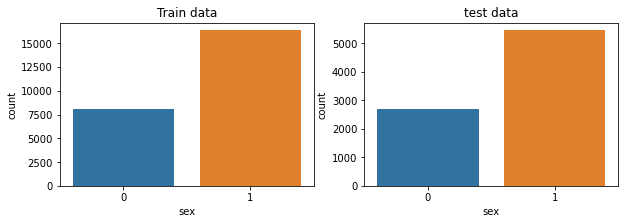

In [32]:
fig,ax=plt.subplots(1,2,figsize=(10, 3))
sns.countplot(X_train['sex'],label='count',ax=ax[0])
ax[0].set_title('Train data')

sns.countplot(X_test['sex'],label='count',ax=ax[1])
ax[1].set_title('test data')
plt.show()

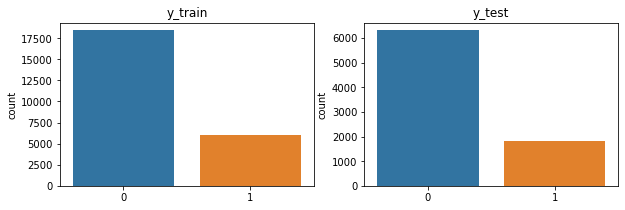

In [33]:
fig,ax=plt.subplots(1,2,figsize=(10, 3))
sns.countplot(y_train,label='count',ax=ax[0])
ax[0].set_title('y_train')
sns.countplot(y_test,label='count',ax=ax[1])
ax[1].set_title('y_test')
plt.show()

### LogisticRegression

In [34]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred=lr.predict(X_test)

Confusion Matrix : 
 [[6093  210]
 [1360  478]]


classification_report : 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      6303
           1       0.69      0.26      0.38      1838

    accuracy                           0.81      8141
   macro avg       0.76      0.61      0.63      8141
weighted avg       0.79      0.81      0.77      8141



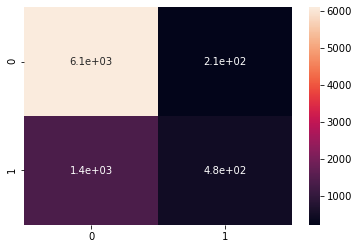

In [36]:
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n',cm)
sns.heatmap(cm,annot=True);
print('\n')
print('classification_report : \n',classification_report(y_test,y_pred))

# Recall or True Positive Rate (TPR) or Sensitivity or Probability of detection
# When it's actually yes, how often does it predict yes?
# Recall=TP/TP+FN(actual)

# precision
# When it predicts yes, how often is it correct? or what fraction of positive prediction 
# are correct
# TP/TP+FP(predicted)

#True Negative Rate (TNR) or Specificity
# When it's actually no, how often does it predict no?
# TNR=TN/TN+FP

# False Positive Rate (FPR) or 1 - specificity
# When it's actually no, how often does it predict yes? or what fraction of all negetive
# instance does the classifier incorrectly indentify as positive
# FPR=FP/TN+FP

# Missclassification Rate
# Overall how often is it wrong (overall incorrect prediction)
# FP+FN/total

# F1-score
# It is difficult to compare two models with low precision and high recall or vice versa. 
# Diffcult to distiguish between precision and recall for the project.
# So to make them comparable, we use F1-Score. F1-score helps to measure Recall and Precision 
# at the same time. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme 
# values more.It is maximum when Precision is equal to Recall.
# F1=2*((precision*recall)/(precision+recall))

In [37]:
print('Accuracy: ',round(accuracy_score(y_test,y_pred)*100,2)) # TP+TN/total is accuracy
# print((cm[0,0]+cm[1,1])/cm.sum())

# Missclassification Rate: Overall how often is it wrong (overall incorrect prediction)
# FP+FN/total
print('Missclassification Rate: ',round((cm[0,1]+cm[1,0])/cm.sum()*100,2))

Accuracy:  80.71
Missclassification Rate:  19.29


In [38]:
print('Recall: ',round((cm[1,1]/(cm[1,1]+cm[1,0]))*100,2)) # Recall=TP/TP+FN(actual)

print('Precision: ',round((cm[1,1]/(cm[1,1]+cm[0,1]))*100,2)) # TP/TP+FP(predicted)

Recall:  26.01
Precision:  69.48


In [39]:
pd.Series(y_pred).value_counts() # predicted by the model 0 and 1 sample

0    7453
1     688
dtype: int64

In [40]:
pd.Series(y_test).value_counts() # test 0 and 1 sample

0    6303
1    1838
dtype: int64

In [41]:
pd.Series(y_test).value_counts().sum() # total sample

8141

### SVM

In [42]:
svclassifier=SVC(kernel='rbf')

In [43]:
svclassifier.fit(X_train, y_train)

SVC()

In [44]:
y_pred=svclassifier.predict(X_test)

In [45]:
cm=confusion_matrix(y_test,y_pred)
print('confusion_matrix:\n',cm)

confusion_matrix:
 [[6292   11]
 [1554  284]]


In [46]:
print('Accuracy:',round(accuracy_score(y_test,y_pred)*100,2))

Accuracy: 80.78


In [31]:
# C parameter tuning,Without data scalling
# C_values=[0.5,1.0,10.0,100.0,1000.0,10000.0,50000.0,100000.0] # default=1.0

# for i in C_values:
#     svclassifier=SVC(kernel='rbf',C=i)
#     svclassifier.fit(X_train, y_train)
#     y_pred=svclassifier.predict(X_test)
#     a=(round(accuracy_score(y_test,y_pred)*100,2))
#     print('C parameter is {0} and Accuracy is {1}'.format(i,a))

In [32]:
# C and Gamma parameter tuning, Without data scalling
# gamma_value=[50000.0,100000.0]
# C_values=[50000.0,100000.0]  # default=1.0

# for g in gamma_value:
#     '\n'
# for i in C_values:
#     svclassifier=SVC(kernel='rbf',C=i,gamma='auto')
#     svclassifier.fit(X_train, y_train)
#     y_pred=svclassifier.predict(X_test)
#     a=(round(accuracy_score(y_test,y_pred)*100,2))
#         print('Gamma is {}'.format(g))
#     print('C parameter is {0} and Accuracy is {1}'.format(i,a))
        
        
#         Result

# Gamma is 50000.0
# C parameter is 50000.0 and Accuracy is 77.39
# Gamma is 50000.0
# C parameter is 100000.0 and Accuracy is 77.39
# Gamma is 100000.0
# C parameter is 50000.0 and Accuracy is 77.39
# Gamma is 100000.0
# C parameter is 100000.0 and Accuracy is 77.39

### Cross Validation

In [47]:
X=df[['age','fnlwgt','education-num','sex','capital-gain','capital-loss','hours-per-week']]
labelencoder=LabelEncoder()
X['sex']=labelencoder.fit_transform(X['sex'])
Y=df['income']
Y=labelencoder.fit_transform(Y)

In [48]:
kfold_val=KFold(10)
svclassifier=SVC(kernel='rbf')
cross_val_result=cross_val_score(svclassifier,X,Y,cv=kfold_val)
cross_val_result

array([0.78999079, 0.80313268, 0.80497543, 0.79176904, 0.79484029,
       0.8009828 , 0.79637592, 0.79668305, 0.79269042, 0.78839066])

In [49]:
print('average accuracy : ',np.mean(cross_val_result))
print('min. accuracy : ',cross_val_result.min())
print('max. accuracy : ',cross_val_result.max())

average accuracy :  0.7959831083909992
min. accuracy :  0.7883906633906634
max. accuracy :  0.8049754299754299


In [50]:
stratified=StratifiedKFold(n_splits=5) # it is use when data contain imbalanced classes
cross_val_result=cross_val_score(svclassifier,X,Y,cv=stratified)
cross_val_result

array([0.79579303, 0.79437961, 0.79499386, 0.79745086, 0.79422604])

In [51]:
print('average accuracy : ',np.mean(cross_val_result))
print('min. accuracy : ',cross_val_result.min())
print('max. accuracy : ',cross_val_result.max())

average accuracy :  0.7953686795752664
min. accuracy :  0.7942260442260443
max. accuracy :  0.79745085995086


### Normalization and GridSearch

In [52]:
scaler=MinMaxScaler()
Scaled_X_train=scaler.fit_transform(X_train)
Scaled_X_test=scaler.transform(X_test)

grid_param={'C':[0.5,1.0,10.0,100.0],'kernel':['rbf','sigmoid']}
gridsvclassifier=GridSearchCV(SVC(),grid_param)
gridsvclassifier.fit(Scaled_X_train, y_train)
y_pred=gridsvclassifier.predict(Scaled_X_test)
cm=confusion_matrix(y_test,y_pred)

In [53]:
print('confusion_matrix:\n',cm)
print('\nAccuracy:',round(accuracy_score(y_test,y_pred)*100,2))
print('\nBest Parameters:',gridsvclassifier.best_params_)
print('\nBest Estimator:',gridsvclassifier.best_estimator_)
print('\nBest Score:',gridsvclassifier.best_score_)
print('\nBest Index:',gridsvclassifier.best_index_)

confusion_matrix:
 [[5997  306]
 [ 978  860]]

Accuracy: 84.23

Best Parameters: {'C': 100.0, 'kernel': 'rbf'}

Best Estimator: SVC(C=100.0)

Best Score: 0.831941031941032

Best Index: 6


### Decision Tree

In [54]:
treeclr=DecisionTreeClassifier()
treeclr.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
y_pred=treeclr.predict(X_test)
tree_cm=confusion_matrix(y_test,y_pred)
print('confusion_matrix:\n',tree_cm)
print('\naccuracy:',round(accuracy_score(y_test,y_pred)*100,2))

confusion_matrix:
 [[5369  934]
 [ 792 1046]]

accuracy: 78.8


### Decision Tree with Normalize data

In [56]:
treeclr_scaled=DecisionTreeClassifier()
treeclr_scaled.fit(Scaled_X_train, y_train)

DecisionTreeClassifier()

In [57]:
y_pred1=treeclr_scaled.predict(Scaled_X_test)
tree_cm1=confusion_matrix(y_test,y_pred1)
print('confusion_matrix:\n',tree_cm1)
print('\nAccuracy:',round(accuracy_score(y_test,y_pred1)*100,2))

confusion_matrix:
 [[5350  953]
 [ 787 1051]]

Accuracy: 78.63


### Random Forest

In [58]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred1=model.predict(X_test)

In [59]:
cm2=confusion_matrix(y_test,y_pred1)
print('confusion_matrix:\n',cm2)
print('\naccuracy:',round(accuracy_score(y_test,y_pred1)*100,2))

confusion_matrix:
 [[5714  589]
 [ 814 1024]]

accuracy: 82.77


In [60]:
importance_value=np.round((model.feature_importances_)*100,2)
# print(importance_value)
# print('\n')
# for c,i in zip(X_train.columns,importance_features):
#     print('Feature is {0} and importance is {1}'.format(c,i))
importance_features=[(feature,importance1) for feature,importance1 in zip(X_train.columns,importance_value)]
importance_features=sorted(importance_features,key=lambda x: x[1],reverse=True) 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in importance_features];

Variable: fnlwgt               Importance: 34.47
Variable: age                  Importance: 20.63
Variable: capital-gain         Importance: 13.64
Variable: education-num        Importance: 12.48
Variable: hours-per-week       Importance: 10.45
Variable: capital-loss         Importance: 4.85
Variable: sex                  Importance: 3.49


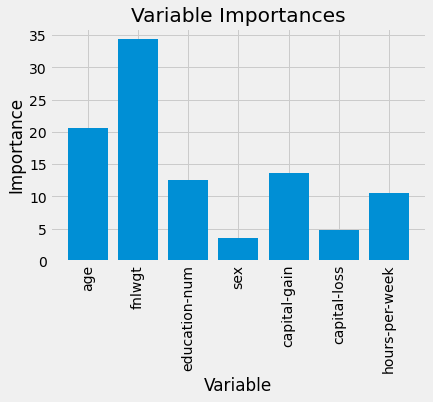

In [61]:
# use magic command for Jupyter Notebooks
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importance_value)))
# Make a bar chart
plt.bar(x_values, importance_value, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X_train.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

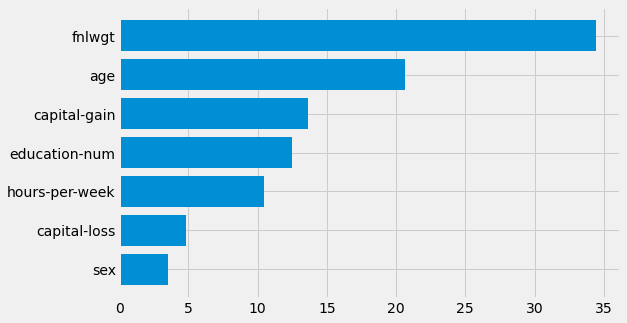

In [62]:
# it can also be done
# converting into DataFrame
importance_data=pd.DataFrame(importance_features,columns=['features','importance'])
importance_data

# plotting
plt.figure(figsize=(8,5))
plt.barh(importance_data['features'],importance_data['importance'])
plt.gca().invert_yaxis()
plt.show()

In [63]:
# let's drop the features which have low importance
X.columns
X1=X.drop(columns=['capital-loss','sex'],axis=1)

In [64]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,Y,random_state=100,train_size=0.75)

In [65]:
model1=RandomForestClassifier()
model.fit(X_train1,y_train1)
y_pred1=model.predict(X_test1)

In [66]:
cm2=confusion_matrix(y_test1,y_pred1)
print(cm2)
accuracy_score(y_test1,y_pred1)

[[5487  693]
 [ 998  963]]


0.7922859599557794

#### Prepare the Model which have high accuracy (That is SVM (kernel='rbf',C=100.0) with Normalized data)

In [128]:
# normalization
scaler=MinMaxScaler()
Scaled_X_train=scaler.fit_transform(X_train)
Scaled_X_test=scaler.transform(X_test)

In [129]:
# build model
svclassifier=SVC(kernel='rbf',C=100.0)
svclassifier.fit(Scaled_X_train, y_train)
y_pred=svclassifier.predict(Scaled_X_test)

In [132]:
cm=confusion_matrix(y_test,y_pred)
print('confusion_matrix:\n',cm)
print('\nAccuracy:',round(accuracy_score(y_test,y_pred)*100,2))

confusion_matrix:
 [[5997  306]
 [ 978  860]]

Accuracy: 84.23


In [133]:
X_train.head(n=3)

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week
13474,51,284211,9,0,0,0,35
28958,36,119957,13,0,0,0,35
14735,30,164190,15,1,0,0,40


In [134]:
# quantitative variable
print('Min age {0} and Mix age {1}'.format(np.min(X_train['age']),np.max(X_train['age'])))
print('\nMin fnlwgt {0} and Mix fnlwgt {1}'.format(np.min(X_train['fnlwgt']),np.max(X_train['fnlwgt'])))
print('\nMin capital-gain {0} and Mix capital-gain {1}'.format(np.min(X_train['capital-gain']),np.max(X_train['capital-gain'])))
print('\nMin capital-loss {0} and Mix capital-loss {1}'.format(np.min(X_train['capital-loss']),np.max(X_train['capital-loss'])))
print('\nMin hours-per-week {0} and Mix hours-per-week {1}'.format(np.min(X_train['hours-per-week']),np.max(X_train['hours-per-week'])))
print('\nMin education-num {0} and Mix education-num {1}'.format(np.min(X_train['education-num']),np.max(X_train['education-num'])))
# sex is categorical 1 and 0 so no need to check.

Min age 17 and Mix age 90

Min fnlwgt 13769 and Mix fnlwgt 1484705

Min capital-gain 0 and Mix capital-gain 99999

Min capital-loss 0 and Mix capital-loss 4356

Min hours-per-week 1 and Mix hours-per-week 99

Min education-num 1 and Mix education-num 16


In [135]:
# make data for prediction
Prepare_data = {'age': [50,34,19,19,18,17,43,34], 
                'fnlwgt': [700000,300000,90000,30000,15000,13769,200000,1000000], 
                'education-num': [9,5,3,3,1,1,7,11], 
                'sex': [1,0,1,0,1,0,0,0],
                'capital-gain': [55000,43000,19000,5000,0,0,15,300000],
                'capital-loss':[200,50,0,15,0,0,15,100],
                 'hours-per-week':[50,17,6,4,2,1,11,34]}

# convert it into dataframe
data=pd.DataFrame(Prepare_data)
data

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week
0,50,700000,9,1,55000,200,50
1,34,300000,5,0,43000,50,17
2,19,90000,3,1,19000,0,6
3,19,30000,3,0,5000,15,4
4,18,15000,1,1,0,0,2
5,17,13769,1,0,0,0,1
6,43,200000,7,0,15,15,11
7,34,1000000,11,0,300000,100,34


In [136]:
# normalized
scaled_data=scaler.transform(data)

In [137]:
# give model to predict
predict_result=svclassifier.predict(scaled_data)
print('Predictions are : ',predict_result)

Predictions are :  [1 1 0 0 0 0 0 1]
